# Capstone 2 - King County House Sales


What goes into the price of a home? Using 2014-2015 house sales data from King County, WA, we will explore which factors affect the selling price of a house. Then we will run a regression analysis and test it to see how accurately we can predict house selling prices.

## Part I: Descriptive Statistics

#### Import Libraries
First, let's import the relevant libraries to use.

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as md
%matplotlib inline
mpl.rcParams['figure.figsize'] = (20,5)
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

#### Descriptive Statistics

The next step is getting general summary statistics for each variable. Here we can see that the date column is an object data type, a mix of integers and characters. We will need to clean this column.

The dataset did not originally have the columns "year", "age", and "renovation_age". The "year" column was derived from the "date" (of sale) column in order to compare to "yr_built" and "yr_renovated". The "age" column is the "yr_built" subtracted from the "year" column. The "renovation_age" column is "yr_renovated" subtracted from the "year". Adding these columns makes better use of the information we have for this analysis.

In [3]:
kc_house_data = pd.read_csv('kc_house_data.csv')

print(kc_house_data.describe(), kc_house_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21613 non-null  int64  
 1   date            21613 non-null  object 
 2   price           21613 non-null  float64
 3   bedrooms        21613 non-null  int64  
 4   bathrooms       21613 non-null  float64
 5   sqft_living     21613 non-null  int64  
 6   sqft_lot        21613 non-null  int64  
 7   floors          21613 non-null  float64
 8   waterfront      21613 non-null  int64  
 9   view            21613 non-null  int64  
 10  condition       21613 non-null  int64  
 11  grade           21613 non-null  int64  
 12  sqft_above      21613 non-null  int64  
 13  sqft_basement   21613 non-null  int64  
 14  yr_built        21613 non-null  int64  
 15  yr_renovated    21613 non-null  int64  
 16  zipcode         21613 non-null  int64  
 17  lat             21613 non-null 

#### Exploring Variables in Relation to Price

Before we attempt to run a linear regression on this data, we will explore each variable in relation to price to help us get an understanding of which variables might have a significant effect.

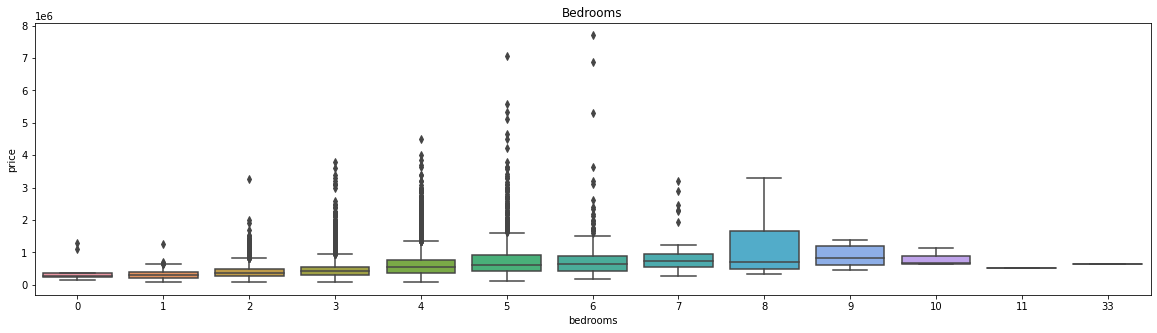

In [33]:
sns.boxplot(x='bedrooms', y='price', data=kc_house_data).set(title='Bedrooms')
plt.show()

An increase in the number of bedrooms in a house seems to be correlated with a higher selling price.

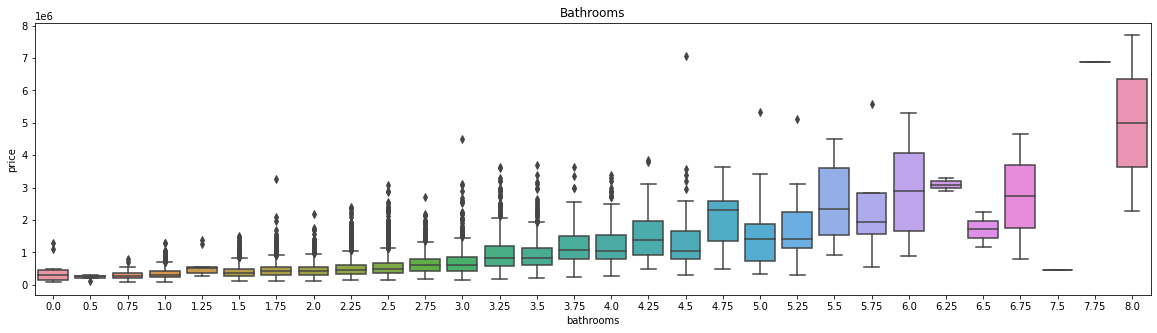

In [34]:
sns.boxplot(x='bathrooms', y='price', data=kc_house_data).set(title='Bathrooms')
plt.show()

Similarly, houses with a larger number of bathrooms tends to sell for a higher price.

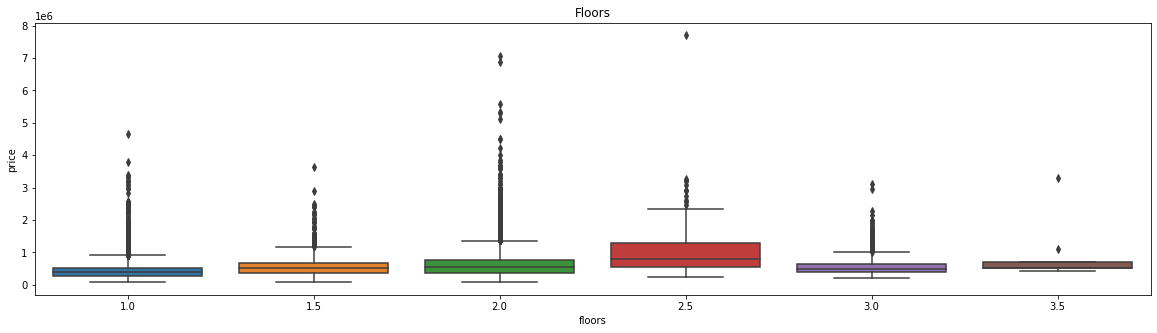

In [35]:
sns.boxplot(x='floors', y='price', data=kc_house_data).set(title='Floors')
plt.show()

An increase in the number of floors up to 2.5 also sell for more.

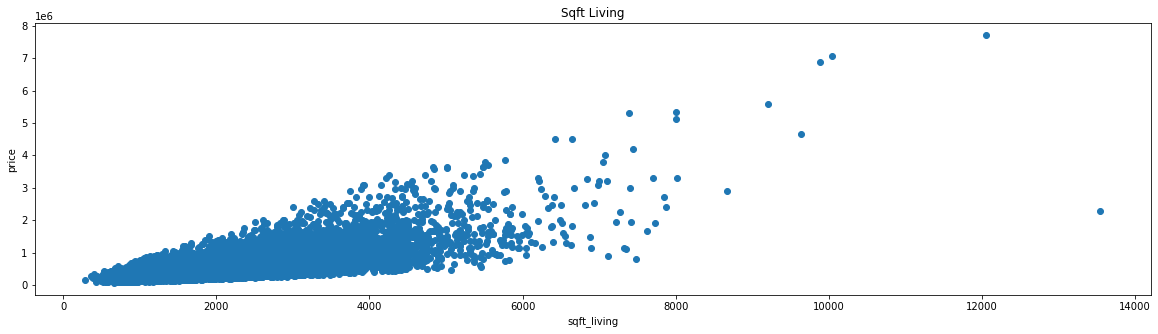

In [38]:
plt.scatter(kc_house_data['sqft_living'], kc_house_data['price'])
plt.title('Sqft Living')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

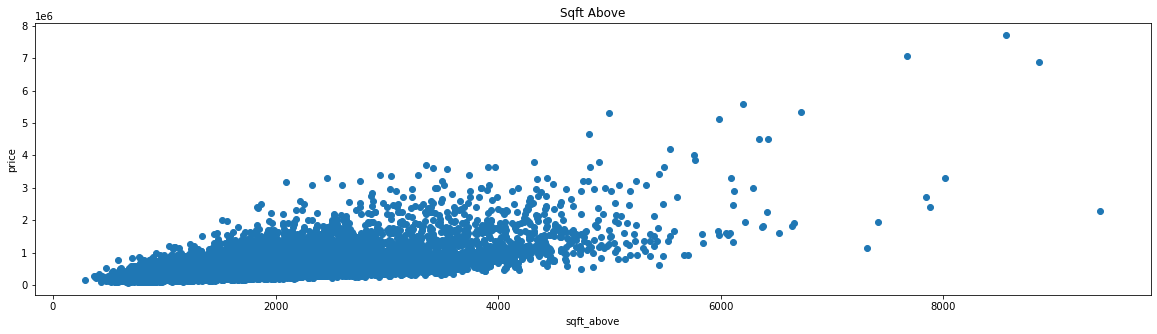

In [20]:
plt.scatter(kc_house_data['sqft_above'], kc_house_data['price'])
plt.title('Sqft Above')
plt.xlabel('sqft_above')
plt.ylabel('price')
plt.show()

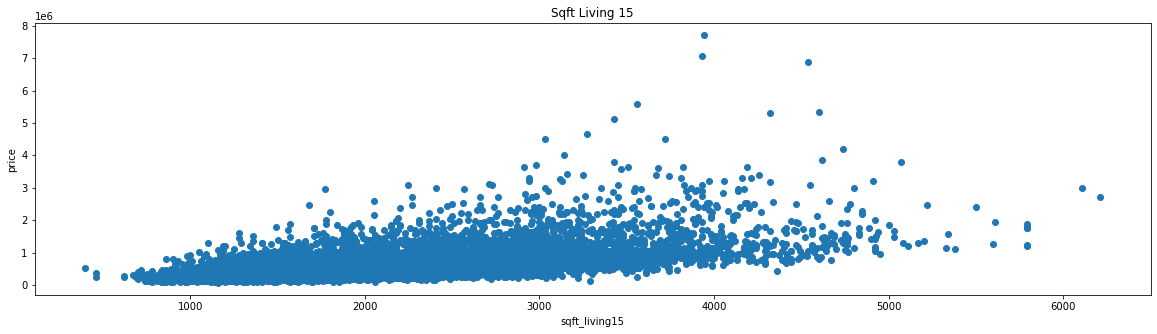

In [23]:
plt.scatter(kc_house_data['sqft_living15'], kc_house_data['price'])
plt.title('Sqft Living 15')
plt.xlabel('sqft_living15')
plt.ylabel('price')
plt.show()

Sqft_living is positively correlated to price, and we see this is similar with sqft_above and sqft_living15.

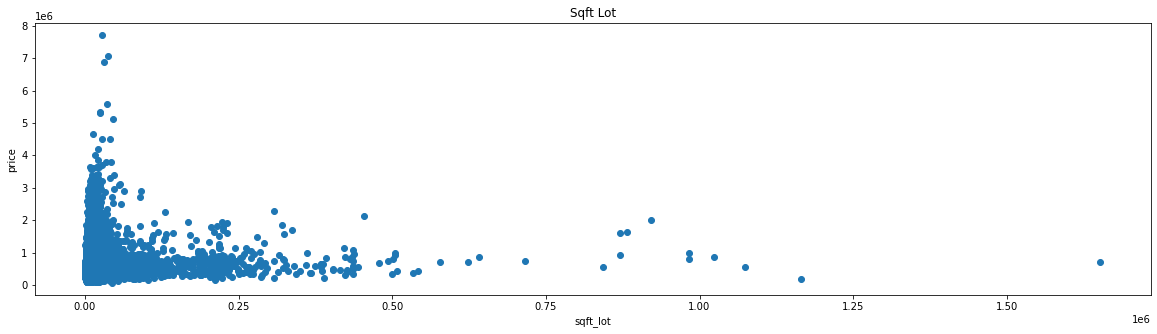

In [39]:
plt.scatter(kc_house_data['sqft_lot'], kc_house_data['price'])
plt.title('Sqft Lot')
plt.xlabel('sqft_lot')
plt.ylabel('price')
plt.show()

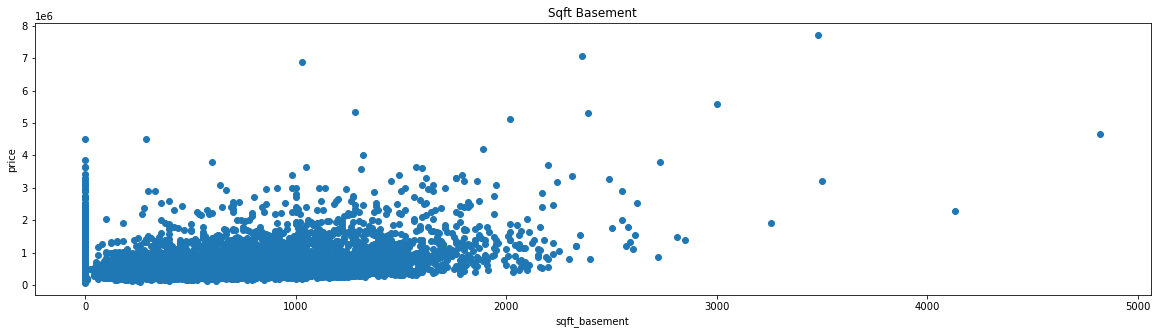

In [22]:
plt.scatter(kc_house_data['sqft_basement'], kc_house_data['price'])
plt.title('Sqft Basement')
plt.xlabel('sqft_basement')
plt.ylabel('price')
plt.show()

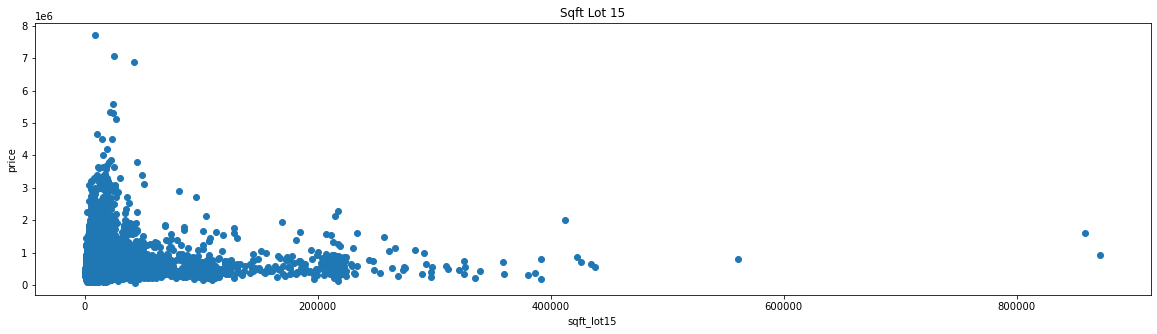

In [24]:
plt.scatter(kc_house_data['sqft_lot15'], kc_house_data['price'])
plt.title('Sqft Lot 15')
plt.xlabel('sqft_lot15')
plt.ylabel('price')
plt.show()

Sqft_lot, sqft_basement, and sqft_lot15 are similar as well. These variables have a weaker positive correlation to price.

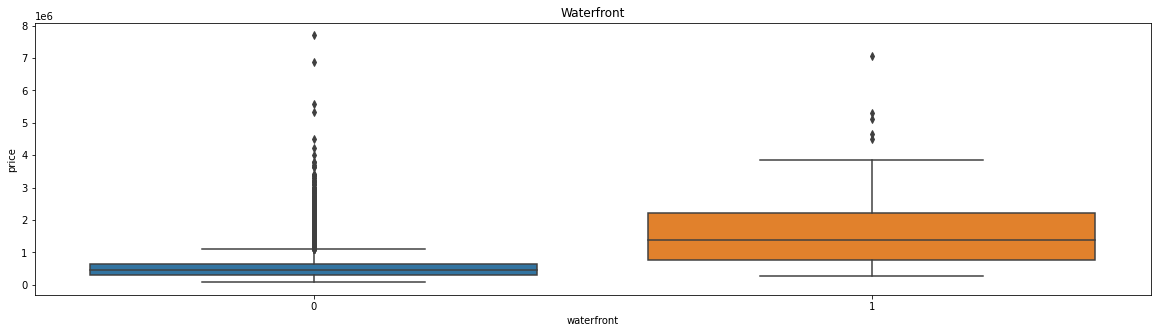

In [36]:
sns.boxplot(x='waterfront', y='price', data=kc_house_data).set(title='Waterfront')
plt.show()

Having a waterfront view is correlated with higher selling prices.

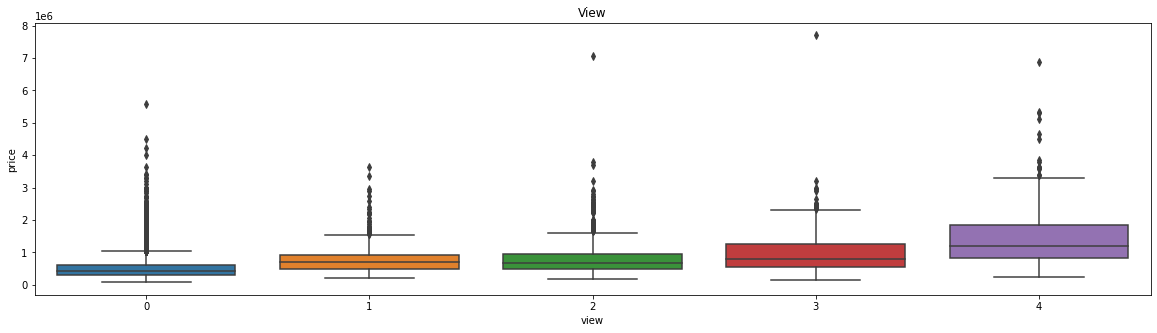

In [44]:
sns.boxplot(x='view', y='price', data=kc_house_data).set(title='View')
plt.show()

Having more or better views seems to positively affect the selling price of a house.

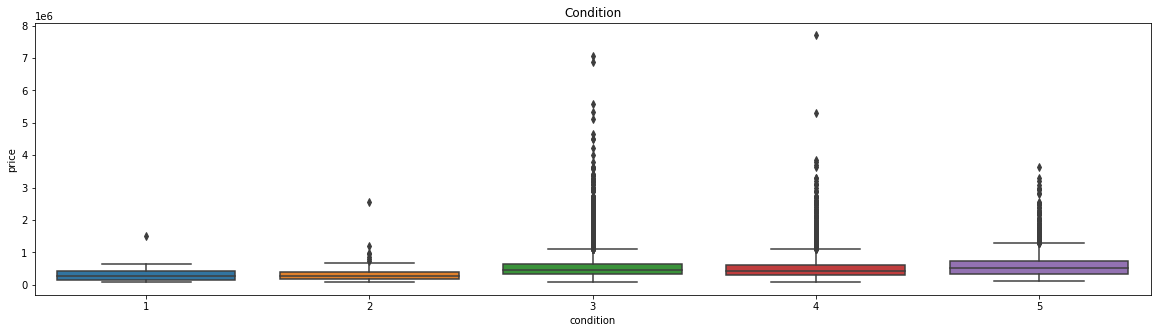

In [45]:
sns.boxplot(x='condition', y='price', data=kc_house_data).set(title='Condition')
plt.show()

The condition of a home matters as there seems to be a positive correlation here again.

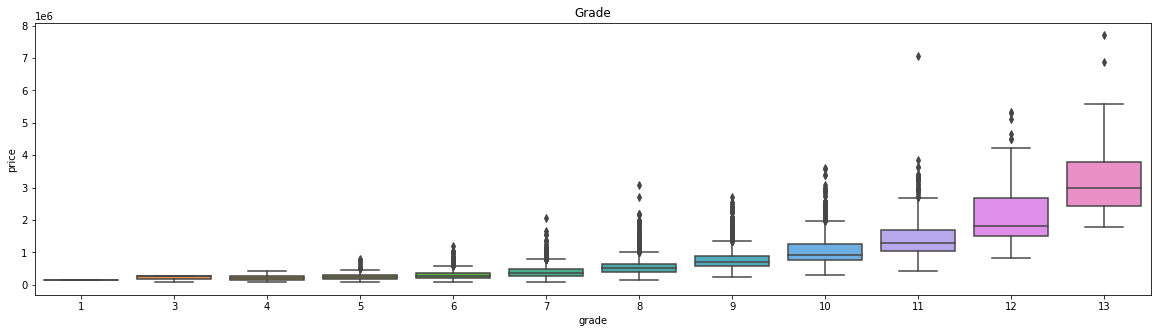

In [46]:
sns.boxplot(x='grade', y='price', data=kc_house_data).set(title='Grade')
plt.show()

A higher grade of a home is positively correlated with sales price.

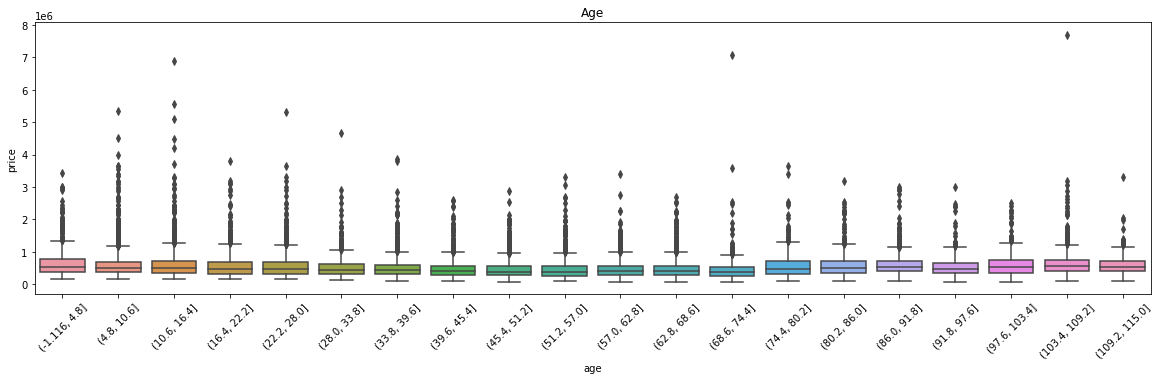

In [8]:
sns.boxplot(x=pd.cut(kc_house_data['age'], 20), y='price', data=kc_house_data).set(title='Age')

plt.xticks(rotation=45)
plt.show()

Average prices of homes do not seem to be affected much by age, however the range of sales prices increases on the lower and higher end of age. Newer houses and much older houses have greater potential to sell for more than houses of moderate age.

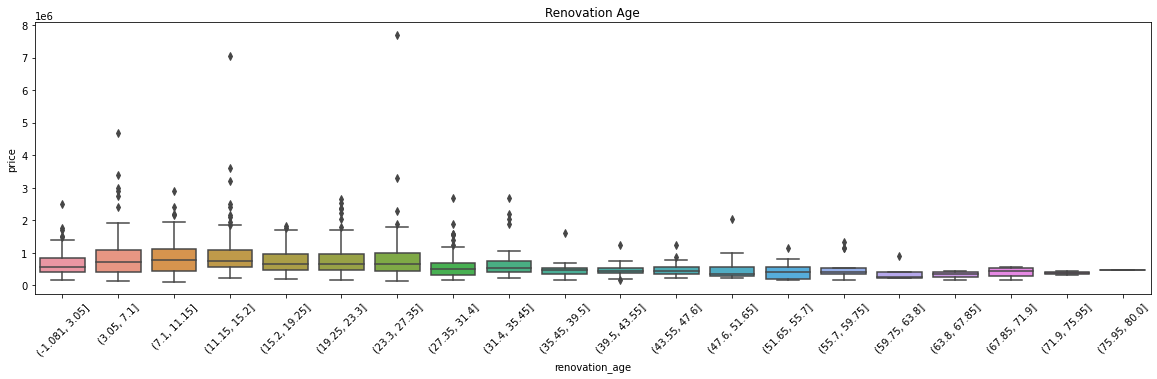

In [9]:
sns.boxplot(x=pd.cut(kc_house_data['renovation_age'], 20), y='price', data=kc_house_data).set(title='Renovation Age')

plt.xticks(rotation=45)
plt.show()

The trend for renovation age is a little different. Just houses that were more recently renovated sell for higher prices.

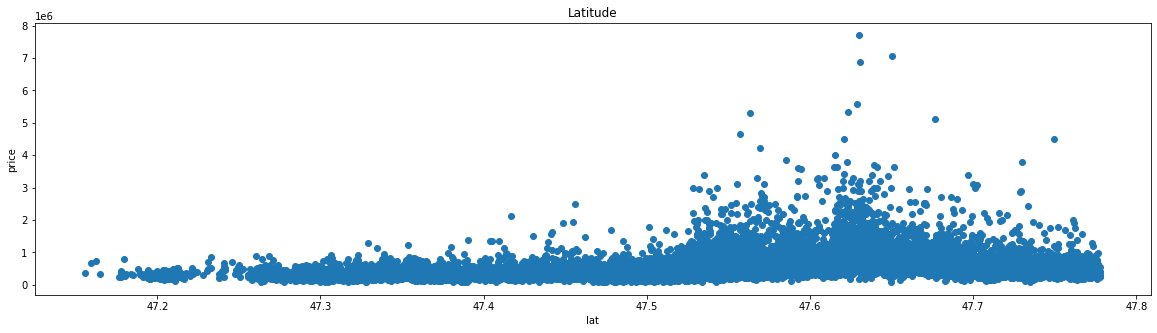

In [47]:
plt.scatter(kc_house_data['lat'], kc_house_data['price'])
plt.title('Latitude')
plt.xlabel('lat')
plt.ylabel('price')
plt.show()

In North America, latitude increases as we move north. There is a slight postive correlation, meaning houses more north sell for higher.

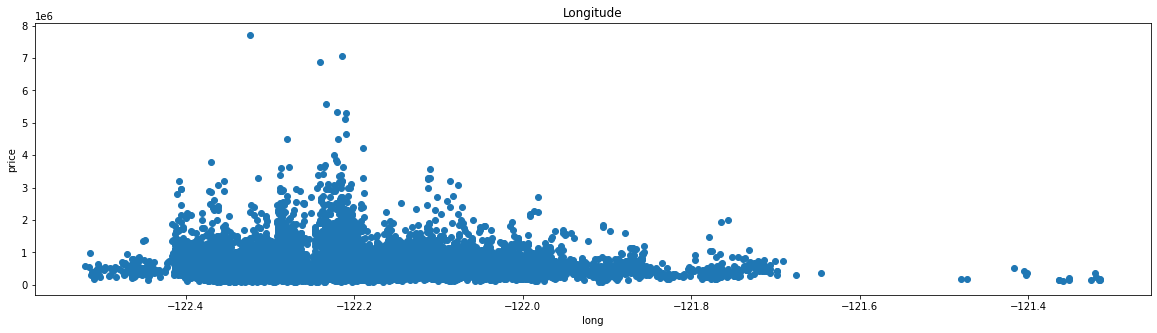

In [48]:
plt.scatter(kc_house_data['long'], kc_house_data['price'])
plt.title('Longitude')
plt.xlabel('long')
plt.ylabel('price')
plt.show()

In North America, longitude increases as we move west. There is a slight positive correlation, meaning houses more west sell for higher.

## Part II: Inferential Statistics

#### Correlation Heatmap

To understand numerically and visualize the correlations in a different way, we can refer to a correlation heatmap.

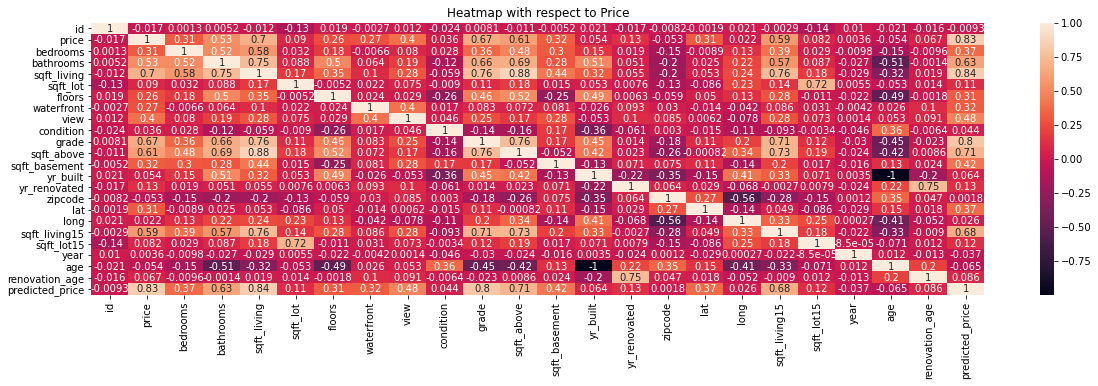

In [15]:
kc_h_data = kc_house_data.corr()
sns.heatmap(kc_h_data, annot=True)

plt.title('Heatmap with respect to Price')
plt.show()

* "sqft_living", "grade", "sqft_above", "sqft_living15", and "bathrooms" have correlation coefficients $>0.5$.

* "view", "sqft_basement", "bedrooms", "lat", "waterfront", "floors", "yr_renovated", "sqft_lot", "sqft_lot15", "yr_built", "condition", "long", and "year" have correlation coefficients $<0.5$ and $>0$.

* "age" and "renovation_age" have correlations coeffiencients $<0$ and $>-0.5$.

Below is another visualization of variables and their correlation to price.

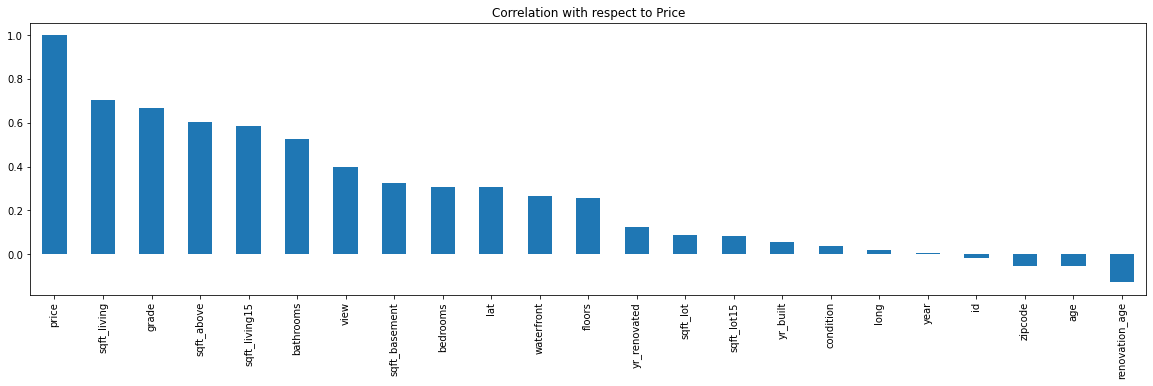

In [14]:
kc_house_data.drop(['price', 'id', 'date'], axis=1).columns
corr = kc_house_data.corr()

corr = corr.sort_values('price', ascending=False)
corr['price'].plot.bar()
plt.title('Correlation with respect to Price')
plt.show()

#### OLS Regression

Using information gathered from the exploratory analysis and correlation heatmap, we can run a linear regression. The independent variables included are
* "bathrooms"
* "floors"
* "sqft_living"
* "waterfront"
* "view"
* "grade"
* "condition"
* "lat"
* "long"
* "age"

Although there were several "sqft" variables correlated to price, including just "sqft_living" (which had the strongest correlation) is sufficient.

In [11]:
indep_var = ['bathrooms', 'bedrooms', 'floors', 'sqft_living', 'waterfront', 'view', 'grade', 'condition', 'lat', 'long', 'age']

Y = kc_house_data['price']
X = kc_house_data[indep_var]
X = sm.add_constant(X) # Add a constant to follow the equation form: Ab + x (X = sm.add_constant(X))
model = sm.OLS(Y,X) # Instantiate the Ordinary Least Squares Model with: model = sm.OLS(Y,X) where Y is the dependent variable and X is the independent variable 
results = model.fit() # Fit the Model (OLSmodelResult = OLSmodel.fit())
results.summary() # Print the OLSModel Summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     4432.
Date:                Sun, 24 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:21:48   Log-Likelihood:            -2.9486e+05
No. Observations:               21613   AIC:                         5.897e+05
Df Residuals:                   21601   BIC:                         5.898e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -3.66e+07   1.41e+06    -25.954      0.000   -3.94e+07   -3.38e+07
bathrooms    4.007e+04   3213.943     12.466      0.000    3.38e+04    4.64e+04
bedrooms    -3.417e+04   1902.449    -17.963      0.000   -3.79e+04   -3.04e+04
floors       1.267e+04   3232.592      3.919      0.000    6333.557     1.9e+04
sqft_living   177.7028      3.094     57.438      0.000     171.639     183.767
waterfront   5.938e+05   1.75e+04     33.905      0.000    5.59e+05    6.28e+05
view         4.929e+04   2105.916     23.404      0.000    4.52e+04    5.34e+04
grade        1.063e+05   2041.422     52.080      0.000    1.02e+05     1.1e+05
condition    2.658e+04   2319.910     11.455      0.000     2.2e+04    3.11e+04
lat          5.519e+05   1.05e+04     52.738      0.000    5.31e+05    5.72e+05
long        -7.774e+04   1.11e+04     -6.988      0.000   -9.95e+04   -5.59e+04
age          2613.9968     69.011     37.878      0.000    2478.729    2749.264
==============================================================================
Omnibus:                    18357.696   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1786153.400
Skew:                           3.573   Prob(JB):                         0.00
Kurtosis:                      46.959   Cond. No.                     2.32e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$R^2 = 0.693$ for this regression, which is not particularly strong. This means that the independent variables in this model can partially explain the variability in house sales prices. The p-values for each independent variable is 0, meaning that each is statistically significant in this regression.

#### Validate Predictions

Let's see how predicted values from our linear model compare to actual house sales prices.

In [12]:
kc_house_data['predicted_price'] = results.predict(X)

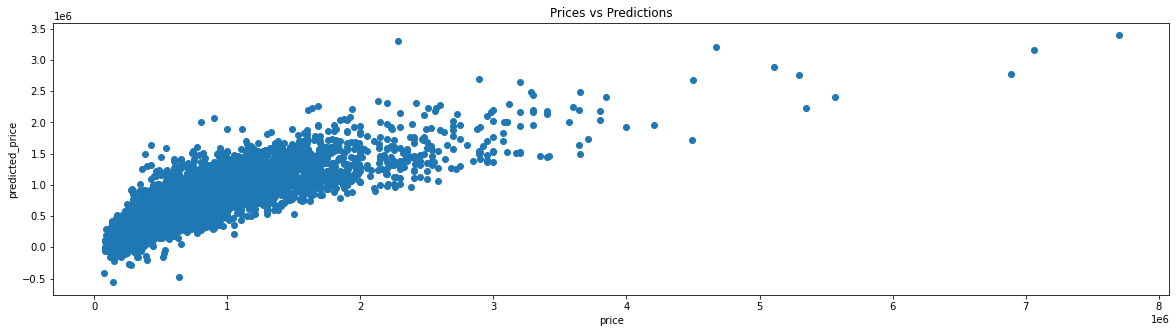

In [14]:
plt.scatter(kc_house_data['price'], kc_house_data['predicted_price'])
plt.title('Prices vs Predictions')
plt.xlabel('price')
plt.ylabel('predicted_price')
plt.show()

We can see that our predicted prices are not very accurate. Otherwise we would see points which form a more compact line with the slope of 1. This tells me that the independent variables can only partially explain and cannot accurately predict the selling price of a home in King County, WA.

#### Summary

From our exploratory analysis and correlation heatmap we were able to determine which variables might do well in a regression model to predict house sales prices in King County, WA. These variables were
* "bathrooms"
* "floors"
* "sqft_living"
* "waterfront"
* "view"
* "grade"
* "condition"
* "lat"
* "long"
* "age"

The regression model had an $R^2$ of $0.693$, which did not do well to predict house sales prices accurately. This model could be further improved with more data about different variables related to house sales.